📌 Introduction

This report explores multidimensional body-measurement data from the NHANES dataset (adult male and female participants).
All analysis is performed using NumPy, Pandas, Matplotlib, and Seaborn inside a Jupyter environment.

🧩 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import os

# Set global visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

🧩 2. Load the Male & Female NHANES Datasets

Purpose:

Load CSV files into NumPy matrices, skipping the header row.

In [2]:
# --- STEP 1: DOWNLOAD ---
base_url = "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/"
filenames = ["nhanes_adult_male_bmx_2020.csv", "nhanes_adult_female_bmx_2020.csv"]

print("Downloading files...")
for filename in filenames:
    if not os.path.exists(filename):
        url = base_url + filename
        urllib.request.urlretrieve(url, filename)
        print(f"Saved: {filename}")
    else:
        print(f"File already exists: {filename}")

# --- STEP 2: READ AND PROCESS ---
# Using comment='#' to skip metadata lines
df_male = pd.read_csv("nhanes_adult_male_bmx_2020.csv", comment='#')
df_female = pd.read_csv("nhanes_adult_female_bmx_2020.csv", comment='#')

# Define specific columns to keep (in order)
cols = ['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST']

# Convert to Numpy matrices
male = df_male[cols].to_numpy()
female = df_female[cols].to_numpy()

print(f"\nMale matrix shape: {male.shape}")
print(f"Female matrix shape: {female.shape}")

File already exists: nhanes_adult_male_bmx_2020.csv
File already exists: nhanes_adult_female_bmx_2020.csv

Male matrix shape: (4081, 7)
Female matrix shape: (4221, 7)


🧩 3. Extract Weight Columns and Plot Histograms:

Purpose:

Visualize male and female weight distributions using subplots.

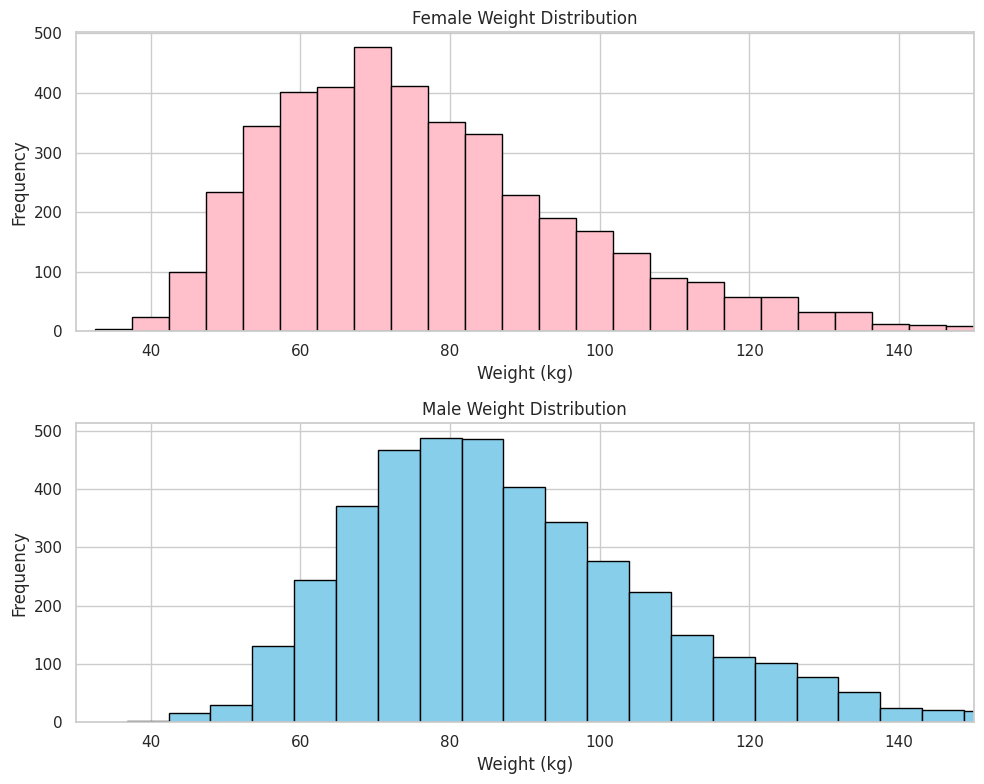

In [3]:
male_weights = male[:, 0]
female_weights = female[:, 0]

plt.figure(figsize=(10, 8))

# Female histogram
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color='pink', edgecolor='black')
plt.title("Female Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(30, 150)

# Male histogram
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color='skyblue', edgecolor='black')
plt.title("Male Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(30, 150)

plt.tight_layout()
plt.show()


🧩 4. Boxplot for Weight Comparison

Purpose:

Compare weights visually between males and females.

/tmp/ipython-input-2670051209.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])


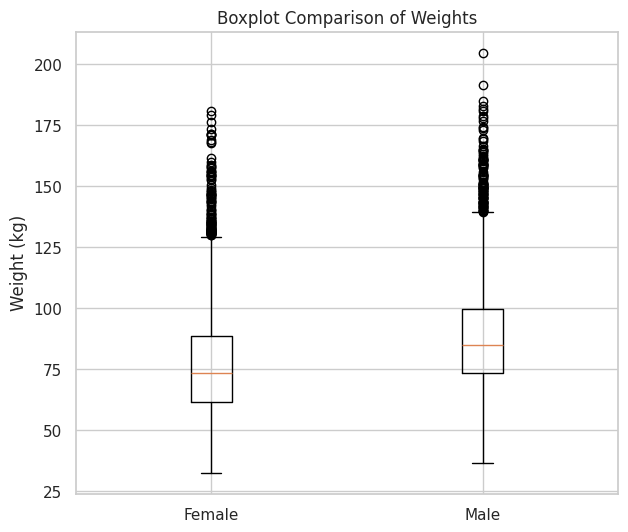

In [4]:
plt.figure(figsize=(7, 6))
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])
plt.title("Boxplot Comparison of Weights")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.show()


🧩 5. Statistical Aggregates

Purpose:

Measure center, spread, and skewness of distributions.

In [5]:
def describe(data):
    return {
        "mean": np.mean(data),
        "median": np.median(data),
        "std": np.std(data),
        "skew": pd.Series(data).skew(),
        "min": np.min(data),
        "max": np.max(data),
    }

print("Female Weight Stats:\n", describe(female_weights))
print("\nMale Weight Stats:\n", describe(male_weights))


Female Weight Stats:
 {'mean': np.float64(77.40379057095475), 'median': np.float64(73.6), 'std': np.float64(21.54250829019315), 'skew': np.float64(1.033728460112216), 'min': np.float64(32.6), 'max': np.float64(180.9)}

Male Weight Stats:
 {'mean': np.float64(88.36454300416565), 'median': np.float64(85.0), 'std': np.float64(21.418936717962495), 'skew': np.float64(0.9846430235310972), 'min': np.float64(36.8), 'max': np.float64(204.6)}


🧩 6. Add BMI Column to Female Dataset

Purpose:

Compute Body Mass Index = weight / height²

In [6]:
heights_f = female[:, 1] / 100  # convert cm → m
weights_f = female[:, 0]

bmi_f = weights_f / (heights_f ** 2)
female = np.column_stack((female, bmi_f))

print("Female shape (with BMI):", female.shape)


Female shape (with BMI): (4221, 8)


🧩 7. Create Standardised Dataset (Z-Scores)

Purpose:

Standardize each column (mean=0, std=1).

In [7]:
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)
print("Standardized female matrix shape:", zfemale.shape)

Standardized female matrix shape: (4221, 8)


🧩 8. Scatterplot Matrix & Correlations

Purpose:

Explore relationships among:

Weight

Height

Waist

Hip

BMI

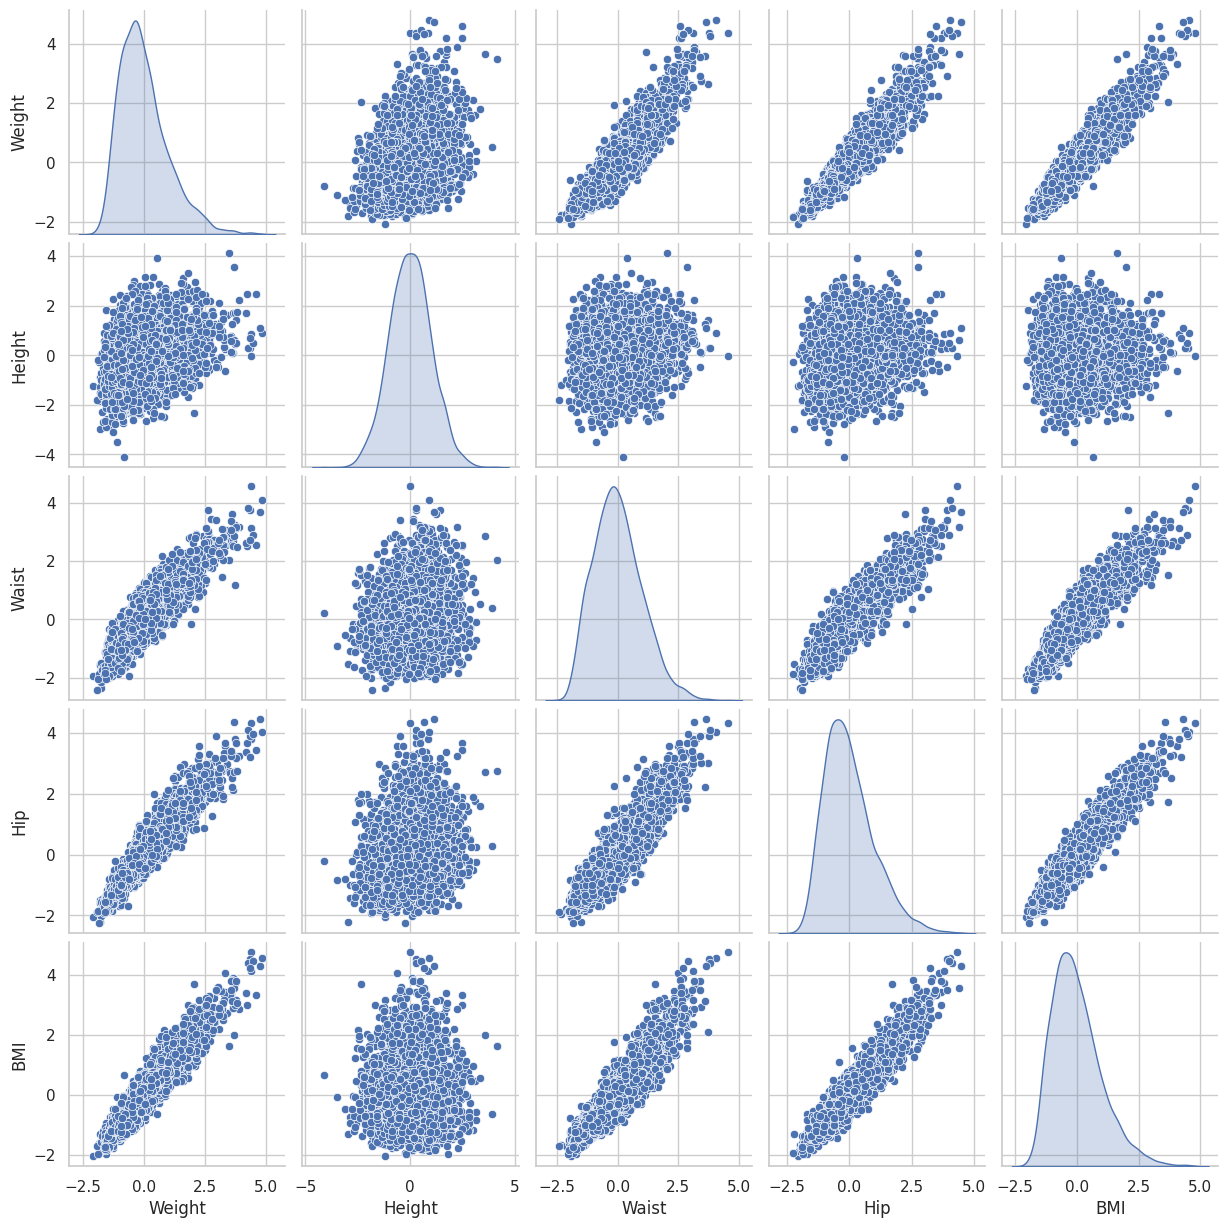

Pearson Correlation:
           Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.345496  0.904550  0.946553  0.945900
Height  0.345496  1.000000  0.126547  0.202895  0.033077
Waist   0.904550  0.126547  1.000000  0.897407  0.921198
Hip     0.946553  0.202895  0.897407  1.000000  0.944199
BMI     0.945900  0.033077  0.921198  0.944199  1.000000

Spearman Correlation:
           Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.338860  0.900169  0.946634  0.937999
Height  0.338860  1.000000  0.108587  0.205405  0.019897
Waist   0.900169  0.108587  1.000000  0.888037  0.923114
Hip     0.946634  0.205405  0.888037  1.000000  0.934196
BMI     0.937999  0.019897  0.923114  0.934196  1.000000


In [8]:
columns = ["Weight", "Height", "UpperArm", "UpperLeg",
           "ArmCirc", "Hip", "Waist", "BMI"]

df = pd.DataFrame(female, columns=columns)
df_z = pd.DataFrame(zfemale, columns=columns)

selected = df_z[["Weight", "Height", "Waist", "Hip", "BMI"]]

sns.pairplot(selected, diag_kind="kde")
plt.show()

print("Pearson Correlation:\n", selected.corr(method='pearson'))
print("\nSpearman Correlation:\n", selected.corr(method='spearman'))


🧩 9. Add Waist-to-Height & Waist-to-Hip Ratios

Purpose:

Add two new metrics to both male and female matrices.

In [9]:
# Female
waist_f = female[:, 6]
hip_f = female[:, 5]
height_f = female[:, 1]

wth_f = waist_f / height_f
whr_f = waist_f / hip_f

female = np.column_stack((female, wth_f, whr_f))

# Male
waist_m = male[:, 6]
hip_m = male[:, 5]
height_m = male[:, 1]

wth_m = waist_m / height_m
whr_m = waist_m / hip_m

male = np.column_stack((male, wth_m, whr_m))


🧩 10. Boxplot of 4 Ratio Distributions

Purpose:

Compare weight-related risk metrics across genders.

/tmp/ipython-input-2223607333.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([wth_f, wth_m, whr_f, whr_m],


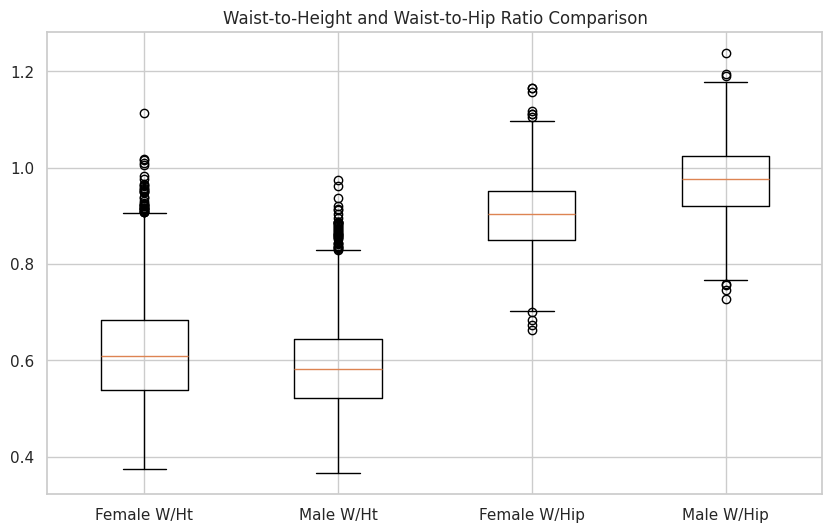

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot([wth_f, wth_m, whr_f, whr_m],
            labels=["Female W/Ht", "Male W/Ht", "Female W/Hip", "Male W/Hip"])
plt.title("Waist-to-Height and Waist-to-Hip Ratio Comparison")
plt.grid(True)
plt.show()

🧩 11. Advantages & Disadvantages of BMI, WHtR, WHR

In [11]:
print("""
BMI:
 + Simple, easy to calculate
 - Does not differentiate fat vs muscle
 - Cannot measure fat distribution

Waist-to-Height Ratio:
 + Strong indicator of abdominal fat
 + Predicts cardiovascular risk
 - Needs accurate waist measurement

Waist-to-Hip Ratio:
 + Measures visceral fat distribution
 - Hip measurement error affects value
""")



BMI:
 + Simple, easy to calculate
 - Does not differentiate fat vs muscle
 - Cannot measure fat distribution

Waist-to-Height Ratio:
 + Strong indicator of abdominal fat
 + Predicts cardiovascular risk
 - Needs accurate waist measurement

Waist-to-Hip Ratio:
 + Measures visceral fat distribution
 - Hip measurement error affects value



🧩 12. Standardised Values for Lowest & Highest BMI

In [12]:
bmi_z = zfemale[:, 7]   # BMI column after z-scoring
idx = np.argsort(bmi_z)

lowest5 = zfemale[idx[:5], :]
highest5 = zfemale[idx[-5:], :]

print("Lowest 5 BMI (standardised):\n", lowest5)
print("\nHighest 5 BMI (standardised):\n", highest5)


Lowest 5 BMI (standardised):
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

Highest 5 BMI (standardised):
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.05

In [13]:
from IPython.display import HTML, display

html_code = """
<style>
    /* Import premium modern font */
    @import url('https://fonts.googleapis.com/css2?family=Inter:wght@400;600;800&display=swap');

    .final-container {
        position: relative;
        height: 550px;
        max-width: 100%; /* Ensures it fits within mobile screens */
        width: 100%;     /* Takes up available width */
        background: #0a0e17;
        border-radius: 24px;
        overflow: hidden;
        font-family: 'Inter', sans-serif;
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        box-shadow: 0 20px 50px rgba(0,0,0,0.8);
        box-sizing: border-box; /* Ensures padding doesn't break width */
    }

    /* --- Subtle Deep Aurora Background Animation --- */
    .aurora-bg {
        position: absolute;
        top: -50%; left: -50%;
        width: 200%; height: 200%;
        background: radial-gradient(circle at center, #1a237e, #000000);
        opacity: 0.6;
        z-index: 0;
    }
    .aurora-accent {
        position: absolute;
        top: -50%; left: -50%;
        width: 200%; height: 200%;
        background: conic-gradient(from 180deg at 50% 50%, #000000 0deg, #311b92 160deg, #00bcd4 220deg, #000000 360deg);
        opacity: 0.4;
        mix-blend-mode: screen;
        animation: slowRotate 20s linear infinite;
        z-index: 1;
    }

    /* --- Main Content --- */
    .main-content {
        z-index: 10;
        text-align: center;
        margin-bottom: 80px; /* Space for footer */
        padding: 0 20px; /* Prevent text touching edges on mobile */
        animation: fadeUpSlow 1.5s cubic-bezier(0.2, 0.8, 0.2, 1) forwards;
    }

    .success-icon-modern {
        font-size: 60px;
        background: linear-gradient(135deg, #00bcd4, #311b92);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        margin-bottom: 20px;
        display: inline-block;
        animation: iconPop 1s cubic-bezier(0.34, 1.56, 0.64, 1);
    }

    h1.title-modern {
        font-size: 4em;
        font-weight: 800;
        margin: 0;
        color: white;
        letter-spacing: -1px;
        line-height: 1.1;
        position: relative;
        background: linear-gradient(to right, #ffffff 0%, #ffffff 40%, #00bcd4 50%, #ffffff 60%, #ffffff 100%);
        background-size: 200% auto;
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        animation: shimmer 5s infinite linear;
    }

    p.subtitle-modern {
        font-size: 1.3em;
        color: #94a3b8;
        font-weight: 400;
        margin-top: 16px;
        letter-spacing: 1px;
    }

    /* --- Professional Footer Bar --- */
    .footer-bar-modern {
        position: absolute;
        bottom: 0;
        width: 100%;
        height: 80px;
        background: rgba(255, 255, 255, 0.03);
        backdrop-filter: blur(20px);
        border-top: 1px solid rgba(255, 255, 255, 0.08);
        display: flex;
        justify-content: space-between;
        align-items: center;
        padding: 0 40px;
        box-sizing: border-box;
        z-index: 20;
        animation: slideUp 1.5s cubic-bezier(0.2, 0.8, 0.2, 1) forwards;
        animation-delay: 0.5s;
        opacity: 0;
    }

    .corizo-badge {
        display: flex;
        align-items: center;
        font-weight: 600;
        color: white;
        font-size: 1.1em;
        white-space: nowrap; /* Keeps text on one line */
    }
    .corizo-badge::before {
        content: '';
        display: inline-block;
        width: 12px; height: 12px;
        background: #00bcd4;
        border-radius: 50%;
        margin-right: 12px;
        box-shadow: 0 0 15px #00bcd4;
    }

    .author-credit {
        color: #94a3b8;
        font-weight: 400;
        font-size: 1em;
        white-space: nowrap;
    }
    .author-name {
        color: white;
        font-weight: 700;
        margin-left: 8px;
    }

    /* --- Animations Keyframes --- */
    @keyframes slowRotate { 0% { transform: rotate(0deg) scale(1.2); } 100% { transform: rotate(360deg) scale(1.2); } }
    @keyframes fadeUpSlow { from { opacity: 0; transform: translateY(40px) scale(0.95); } to { opacity: 1; transform: translateY(0) scale(1); } }
    @keyframes slideUp { from { opacity: 0; transform: translateY(100%); } to { opacity: 1; transform: translateY(0); } }
    @keyframes iconPop { 0% { transform: scale(0) rotate(-45deg); } 100% { transform: scale(1) rotate(0deg); } }
    @keyframes shimmer { to { background-position: 200% center; } }


    /* --- MOBILE / RESPONSIVE ADJUSTMENTS --- */
    /* This handles screens smaller than 768px (Tablets & Phones) */
    @media (max-width: 768px) {
        .final-container {
            height: 450px; /* Slightly shorter on mobile */
        }
        h1.title-modern {
            font-size: 2.5em; /* Smaller title */
        }
        p.subtitle-modern {
            font-size: 1em;
        }
        .footer-bar-modern {
            padding: 0 20px; /* Less padding on edges */
        }
        .corizo-badge, .author-credit {
            font-size: 0.9em; /* Smaller footer text */
        }
    }

    /* This handles very small screens (Phones < 480px) */
    @media (max-width: 480px) {
        h1.title-modern {
            font-size: 2em; /* Even smaller title */
        }
        .footer-bar-modern {
            flex-direction: column; /* Stack footer items vertically */
            justify-content: center;
            gap: 5px;
            height: auto;
            padding: 15px 20px;
        }
        .corizo-badge {
            margin-bottom: 5px;
        }
        .main-content {
            margin-bottom: 100px; /* More room for stacked footer */
        }
    }

</style>

<div class="final-container">
    <div class="aurora-bg"></div>
    <div class="aurora-accent"></div>

    <div class="main-content">
        <div class="success-icon-modern">
            <svg xmlns="http://www.w3.org/2000/svg" width="64" height="64" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"><path d="M22 11.08V12a10 10 0 1 1-5.93-9.14"></path><polyline points="22 4 12 14.01 9 11.01"></polyline></svg>
        </div>
        <h1 class="title-modern">PROJECT ACCOMPLISHED.</h1>
        <p class="subtitle-modern">NHANES Exploratory Data Analysis Complete</p>
    </div>

    <div class="footer-bar-modern">
        <div class="corizo-badge">
            Corizo Internship Project
        </div>
        <div class="author-credit">
            Designed & Developed by <span class="author-name">Vivek</span>
        </div>
    </div>

</div>
"""

display(HTML(html_code))